# To get started , we import the nacessary tools . 

In [2]:
import numpy as np # for numerical computations 
import pandas as pd  # for data cleaning and manipulation 
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns # for enhaced statistical visualization 
%matplotlib inline  
# -> this line ensures that matplotlib plots appear inline in the notebook 

we want to load dataset and name it (Df) 

In [3]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


---
# the frist step : is to analyze each column one by one and define what each represents
- survived : indicates whether the passengers on board the Titanic are alive or dead, with 0 indicating death and 1 indicating life.


- pclass : There are three cabins or three floors on this ship, which are floors 1, 2, and 3, respectively, and this column indicates the location of passengers in different classes.


- sex : the sex column represents the gender of the passengers on the Titanic.


- age : The Age column represents the age of the Titanic passengers.


- sibsp :  The sibsp column shows how many siblings or spouses each passenger had on board.


- parch : The parch shows how many parents or children each passenger had with them on the ship.


- fare :  The fare column indicates the price of each ticket that the passenger paid to board this ship.


- embarked : The embarked column in the Titanic dataset indicates which port the passenger boarded the Titanic from.
C=Cherbourg------S=Southampton------Q=Queenstown



- class : There are three cabins or three floors on this ship, which are floors 1, 2, and 3, respectively, and this column indicates the location of passengers in different classes.(But in this column it is not written as a number, but as a string)


- who : The who column shows the same gender as man and women.


- adult_male :  The adult male column in the Titanic dataset is a Boolean column that indicates whether the passenger was an adult male or not . True = male and age>=18 ------ false= female and age<18 .


- deck : The deck column in the Titanic dataset indicates which deck or upper floor of the ship the passenger stayed on.


- embark_town : The embarked column in the Titanic dataset indicates which port the passenger boarded the Titanic from.


- alive : The alive column represents a string indicating whether the passengers survived or not.


- alone : The "alone" sign indicates whether or not the passengers are alone.

---



# Now that we have the concept of all the columns, we move on to the second step of cleaning the dataset:

In [4]:
# Checking whether there are missing values ​​in the existing dataset:
df.isna().any()
 # # # according to this command, we found that there are missing values ​​in the (age) column, the (deck) column, and the (embarked) and (embark town) columns

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [5]:
# Now I want to find the percentage of missing values ​​in each column:
(df.isna().sum() / len(df) *100).round(2).sort_values(ascending=False)
# # # 
# According to this command, we understood that the highest missing value in the form of Nan shown in the deck column is 77%, and after that in the age and ebmraked columns, it is 19% and 0.22%, respectively.


deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

In [6]:
#Now we consider the number of missing values ​​in each column:
df.isna().sum().sort_values(ascending=False)
# # #

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Before we examine the missing values ​​in each column, we check whether each column has outliers or not by taking a unique value from each column:

In [7]:
# survived column : # 1
df['survived'].unique() 
### there is no outlier 


array([0, 1])

In [8]:
# pclass column : # 2
df['pclass'].unique()
### there is no outlier 

array([3, 1, 2])

In [9]:
# sex column : # 3 
df['sex'].unique()
### there is no outlier 

array(['male', 'female'], dtype=object)

In [10]:
# age column : # 4 
df['age'].unique() 
### there is an outlier             (******)
# With this command, we found ages that are less than one year old, which doesn't make sense

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
# sibsp column : # 5 
df['sibsp'].unique() 
### there is no outlier  I'm not too sure :/ 

array([1, 0, 3, 4, 2, 5, 8])

In [12]:
# parch column : #6 
df['parch'].unique()
### there is no outlier 

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
# fare columnc: #7 
df['fare'].unique()
### Needs further investigation               (******)

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [14]:
# embarked column : #8 
df['embarked'].unique()
# there is an outlier ----> (nan)     (******)

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
# class column : #9 
df['class'].unique() 
# there is no outlier 

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [16]:
# who column : #10 
df['who'].unique() 
# there is no outlier 

array(['man', 'woman', 'child'], dtype=object)

In [17]:
# adult_male column : #11 
df['adult_male'].unique()
# there is not outlier 

array([ True, False])

In [18]:
# deck column : #12 
df['deck'].unique() 
# there is no outlier 

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
# alive column : #13 
df['alive'].unique()
# ther is no outlier 

array(['no', 'yes'], dtype=object)

In [20]:
# alone column : #14 
df['alone'].unique()
# there is no outlier 


array([False,  True])

Conclusion: According to the above commands, the columns that need to be checked for outliers are as follows: 
1. (Embraked column ) 
2. (fare column )
3. (sibsp column) ^
4. (age column ) ^

# After analyzing and reviewing the columns of the existing dataset with the conclusions we had, we begin cleaning them logically and with reason and argument : 

In [21]:
#review and clening column 'deck'
df.drop(columns='deck',inplace=True)
#the 'deck' column was removed because it contained around 77% missing values , making it unrelilaable . 

In [22]:
# review and claning column 'age'
df['age']=df['age'].fillna(df['age'].median())
###

---
the missing value in the 'age' column were imputed using the median ,as it is less affected by extreme values .
how ever some invalid enttries (such as perecentages or non-numeric data ) were detected in this column . 
these values will be reviewed and either corrected or removed to maintain data quality and consistency .

---

In [23]:
# review column 'age' 
df[df['age']<1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,Southampton,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,Southampton,yes,False


In [24]:
df['age'].dtype

dtype('float64')

---
some 'age' values were recorded as decimals (e.g,0.85,0.92,0.75 and...) representing infants ypunger than one year old .
these values  are valid and were kept in the dataset as the provide accurate information about passenger ages .

---

In [25]:
df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [26]:
#cheking outlier 
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.75)
IQR=Q2-Q1
lower_bound =Q1-1.5*IQR
upper_bound=Q2+1.5*IQR
outliers_column_age=df[(df['age']<lower_bound) | (df['age']>upper_bound)]


---
the interquartile range (IQR) method identifies outliers by measuring the sparead of the middle 50% of data . values below Q1-1.5*IQR or above Q2+1.5*IQR are considered potential outliers.

---

In [27]:
# review column 'sibsp'  
df['sibsp'].unique() 


array([1, 0, 3, 4, 2, 5, 8])

In [28]:
Q1sibsp=df['sibsp'].quantile(0.25)
Q2sibsp=df['sibsp'].quantile(0.75)
IQRsibsp=Q2sibsp-Q1sibsp
lower_bound2=Q1sibsp-1.5*IQRsibsp
upper_bound2=Q2sibsp+1.5*IQRsibsp
outliers_column_sibsp=df[(df['sibsp']<lower_bound2) | (df['sibsp']>upper_bound2)]




doubt cleared about column 'sibsp'

In [29]:
# review column 'fare'  
df['fare'].min()

np.float64(0.0)

In [30]:
df[df['fare']<0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


In [31]:
df[df['fare']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,Southampton,yes,True
277,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,Southampton,no,True
413,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
466,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
481,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,Southampton,no,True
633,0,1,male,28.0,0,0,0.0,S,First,man,True,Southampton,no,True


---
some passengers have a fare value of 0 , which is not an error . this usually occurs because certain individuals(such as crew members,children , or family members on a group ticket) did not separately . therefore ,these values are not considered outliers and will be kept in the datset . 

---

doubt cleared about column 'sibsp'

In [32]:
## review column 'embark_town' and 'embarked'
df['embark_town'].isna().sum()
  

np.int64(2)

In [33]:
df['embarked'].isna().sum()

np.int64(2)

In [34]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [35]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
df.groupby(['embarked','embark_town']).size()
# so we conclude that these two columns have equal values . 

embarked  embark_town
C         Cherbourg      168
Q         Queenstown      77
S         Southampton    644
dtype: int64

In [37]:
df.drop(columns=['embarked'],inplace=True)

---
the columns 'emnarked' and 'embark_town' contain same information , wit 'embarked' being a short -coded version of the ull town name. since they are redundant and this project does not involve model building , the encoded column ('embarked') was removed , and the more descriptive 'embark_town' column was kept. 

---

In [38]:
df['embark_town'].isna().sum()

np.int64(2)

In [39]:
df['embark_town'].fillna('Southampton',inplace=True)


C:\Users\ZRS\AppData\Local\Temp\ipykernel_14052\66256724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna('Southampton',inplace=True)


In [40]:
df['embark_town'].isna().sum()

np.int64(0)

---
the missing value in the 'embark_town' column were filled with 'southampton' ,since the majority of passengers embarked from southampton . this is a reasonable and commonly used approach because it preserves the overall distribution of the feature . 

---

In [41]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# data cleaned 

In [42]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


---
# remove duplicate or equvivalent columns 
survived <--> alive


pclass <--> class


since we are not building a model , we remove 'survived' and 'pclass' as well. 

---

In [43]:
df.drop(columns=['pclass','survived'],inplace=True)

In [44]:
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


# i want to create some new feature that will make analysis easier . 

In [45]:
df['family_size']=df['sibsp']+df['parch'] + 1 


In [46]:
df['age_group']=pd.cut(df['age'],bins=[0,12,18,40,60,120],labels=['child','teen','adult','middle_age','senior'])



---
Two new features were created to enhance the dataset:

1. Family Size: The 'family_size' column was created by summing the number of siblings/spouses ('sibsp') and parents/children ('parch') for each passenger, and adding 1 to include the passenger themselves. This feature represents the total number of family members on board.

2. Age Group: The 'age_group' column was created by categorizing passengers' ages into bins such as 'child', 'teen', 'adult', 'middle_age', and 'senior'. This allows for easier analysis of patterns based on age categories rather than exact ages.
---

In [47]:
df.drop(columns='adult_male',inplace=True)


In [48]:
df

,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,family_size,age_group
0,male,22.0,1,0,7.2500,Third,man,Southampton,no,False,2,adult
1,female,38.0,1,0,71.2833,First,woman,Cherbourg,yes,False,2,adult
2,female,26.0,0,0,7.9250,Third,woman,Southampton,yes,True,1,adult
3,female,35.0,1,0,53.1000,First,woman,Southampton,yes,False,2,adult
4,male,35.0,0,0,8.0500,Third,man,Southampton,no,True,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,Southampton,no,True,1,adult
887,female,19.0,0,0,30.0000,First,woman,Southampton,yes,True,1,adult
888,female,28.0,1,2,23.4500,Third,woman,Southampton,no,False,4,adult
889,male,26.0,0,0,30.0000,First,man,Cherbourg,yes,True,1,adult


---
## 1. Data Cleaning

The dataset has been cleaned and prepared for analysis. The following steps were performed:

- Duplicate and redundant columns removed: Columns such as survived, pclass, and other duplicates were removed to simplify the dataset.
- Missing values handled: Missing values in columns like Age and Embarked were filled using median imputation or the most frequent value.
- Outliers managed: Outliers in numerical columns such as Age and Fare were detected and removed to ensure reliable analysis.

## 2. Feature Engineering

Two new features were created to enhance the dataset:

1. Family Size: The family_size column was created by summing sibsp and parch and adding 1 to include the passenger themselves. This feature represents the total number of family members on board.
2. Age Group: The age_group column was created by categorizing passengers' ages into bins: child, teen, adult, middle_age, and senior. This allows for easier analysis of patterns based on age categories rather than exact ages.

These steps ensured the dataset is clean, consistent, and enriched for exploratory analysis

--- 

C:\Users\ZRS\AppData\Local\Temp\ipykernel_14052\957189037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex',y='age',data=df,palette=colors)


Text(0, 0.5, 'age')

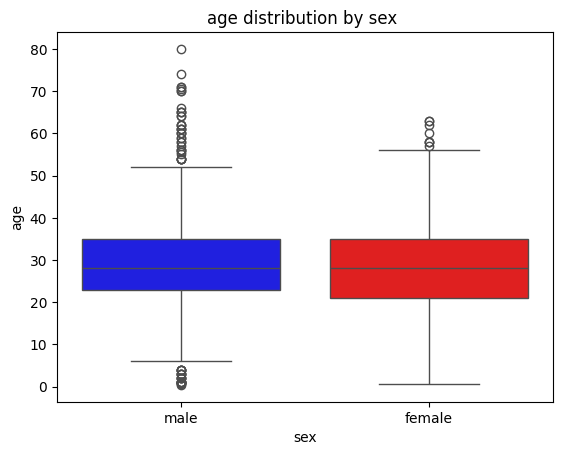

In [50]:
# age distribution by sex 
colors={'male':'blue','female':'red'}
sns.boxplot(x='sex',y='age',data=df,palette=colors)
plt.title('age distribution by sex ')
plt.xlabel('sex')
plt.ylabel('age')


## Age Distribution by Sex

A boxplot was used to visualize the relationship between sex and age.  
It clearly shows the median, quartiles, and outliers for each gender, allowing easy comparison of age patterns between male and female passengers

In [51]:
# fare distribution by sex 
df.groupby('sex')['fare'].max() 

sex
female    512.3292
male      512.3292
Name: fare, dtype: float64

In [52]:
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

C:\Users\ZRS\AppData\Local\Temp\ipykernel_14052\401650896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex',y='fare',data=df,palette=colors)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(38.347222222222214, 0.5, 'fare')

c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


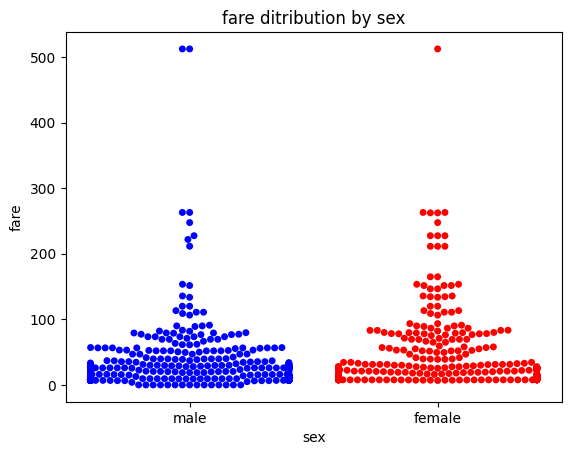

In [53]:
# fare distribution by sex 
sns.swarmplot(x='sex',y='fare',data=df,palette=colors)
plt.title('fare ditribution by sex')
plt.xlabel('sex')
plt.ylabel('fare')

## Fare Analysis by Sex

The analysis of ticket prices shows that the highest individual fares were paid by female passengers, while the average fare is slightly higher for male passengers.  
This indicates that although some women paid the most expensive tickets, men paid more on average overall.

In [54]:
# class distribution by sex 
pd.crosstab(df['sex'],df['class'])

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [55]:
df['sex'].value_counts() 

sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, 'count')

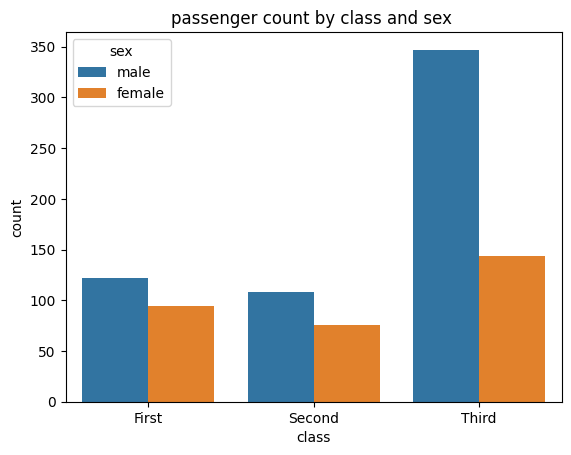

In [56]:
sns.countplot(x='class',hue='sex',data=df)
plt.title('passenger count by class and sex ')
plt.xlabel('class')
plt.ylabel('count')

## Passenger Distribution by Sex and Class

The distribution of passengers by sex and class shows the following:

- Female passengers: 94 in First Class, 76 in Second Class, and 144 in Third Class.  
- Male passengers: 122 in First Class, 108 in Second Class, and 347 in Third Class.  

Overall, the total number of male passengers is higher than female passengers across all classes.  
The majority of both male and female passengers traveled in Third Class, while First Class had the fewest passengers for both genders

In [57]:
# alive distribution sex 
pd.crosstab(df['sex'],df['alive'])

alive,no,yes
sex,,
female,81,233
male,468,109


Text(0.5, 1.0, 'survived by sex ')

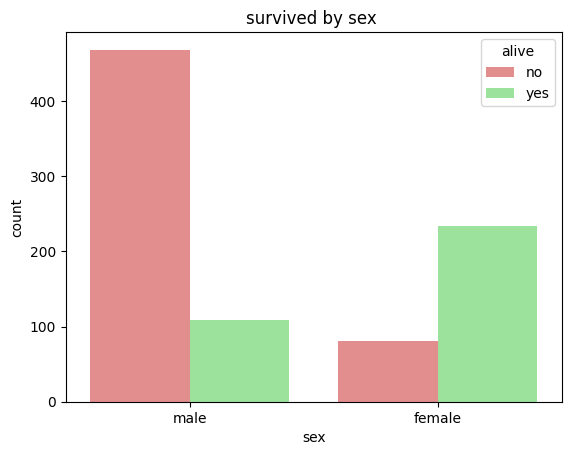

In [58]:
sns.countplot(x='sex',hue='alive',data=df,palette={'no':'lightcoral','yes':'lightgreen'})
plt.title('survived by sex ')

## alive Analysis by Sex

The visualization shows that most female passengers survived (233 survived vs 81 deceased),  
while most male passengers did not survive (109 survived vs 468 deceased).  
This highlights a clear difference in survival rates between genders

In [59]:
# sex distribution alone 
pd.crosstab(df['sex'],df['alone'])  

alone,False,True
sex,,
female,188,126
male,166,411


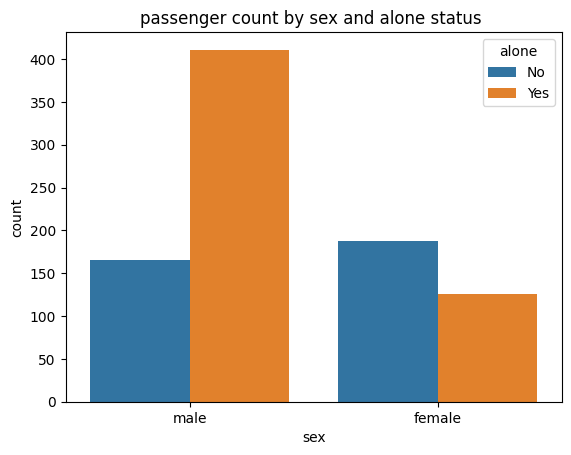

In [60]:
sns.countplot(x='sex',hue='alone',data=df)
plt.title('passenger count by sex and alone status ')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend(title='alone',labels=['No','Yes'])

## Alone Status Analysis by Sex

The analysis of passengers' alone status shows the following:

- Male passengers: 411 were alone and 166 were with family.  
- Female passengers: 126 were alone and 188 were with family.  

This indicates that the number of males traveling alone was more than twice the number of females traveling alone.  
In contrast, more females were traveling with family compared to males.

In [61]:
df

,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,family_size,age_group
0,male,22.0,1,0,7.2500,Third,man,Southampton,no,False,2,adult
1,female,38.0,1,0,71.2833,First,woman,Cherbourg,yes,False,2,adult
2,female,26.0,0,0,7.9250,Third,woman,Southampton,yes,True,1,adult
3,female,35.0,1,0,53.1000,First,woman,Southampton,yes,False,2,adult
4,male,35.0,0,0,8.0500,Third,man,Southampton,no,True,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,Southampton,no,True,1,adult
887,female,19.0,0,0,30.0000,First,woman,Southampton,yes,True,1,adult
888,female,28.0,1,2,23.4500,Third,woman,Southampton,no,False,4,adult
889,male,26.0,0,0,30.0000,First,man,Cherbourg,yes,True,1,adult


In [62]:
# embark_town distribution sex 
pd.crosstab(df['sex'],df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,73,36,205
male,95,41,441


Text(0, 0.5, 'count')

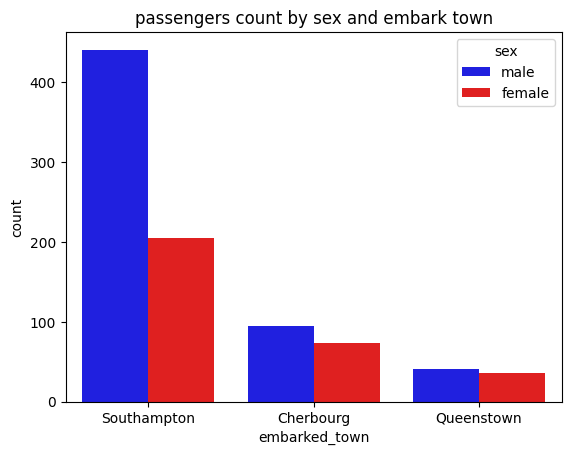

In [63]:
sns.countplot(data=df,x='embark_town',hue='sex',palette=colors)
plt.title('passengers count by sex and embark town')
plt.xlabel('embarked_town')
plt.ylabel('count')

## Passenger Distribution by Sex and Embark Town

The distribution of passengers by sex and embark town is as follows:

- Female passengers: 73 from Cherbourg, 36 from Queenstown, and 205 from Southampton.  
- Male passengers: 95 from Cherbourg, 41 from Queenstown, and 441 from Southampton.  

Overall, male passengers outnumbered female passengers at all embarkation points.  
At Southampton, the number of males was roughly twice the number of females, while at the other two towns the numbers were closer between genders.

In [64]:
pd.crosstab(df['sex'],df['age_group'])

age_group,child,teen,adult,middle_age,senior
sex,,,,,
female,32,36,198,45,3
male,37,34,404,83,19


Text(0, 0.5, 'count')

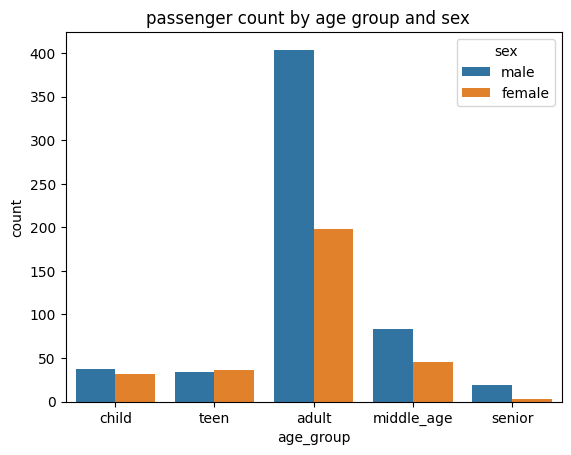

In [65]:
sns.countplot(data=df,x='age_group',hue='sex')
plt.title('passenger count by age group and sex  ')
plt.xlabel('age_group')
plt.ylabel('count')

## Passenger Distribution by Age Group and Sex

The analysis of passengers by age group and sex shows the following patterns:

- The majority of passengers in both genders are adults (18-40 years old).  
- The next largest group is middle-aged (40-60 years old).  
- Senior passengers (80-120 years old) are the least represented, totaling only 22 individuals.  

This indicates that most passengers were adults, with fewer middle-aged and very few senior passengers.  
The distribution is similar across male and female passengers.

C:\Users\ZRS\AppData\Local\Temp\ipykernel_14052\2212589141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex',y='age',data=df,palette=colors,ax=axes[0])
C:\Users\ZRS\AppData\Local\Temp\ipykernel_14052\2212589141.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex',y='fare',data=df,palette=colors,ax=axes[1])
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.1% 

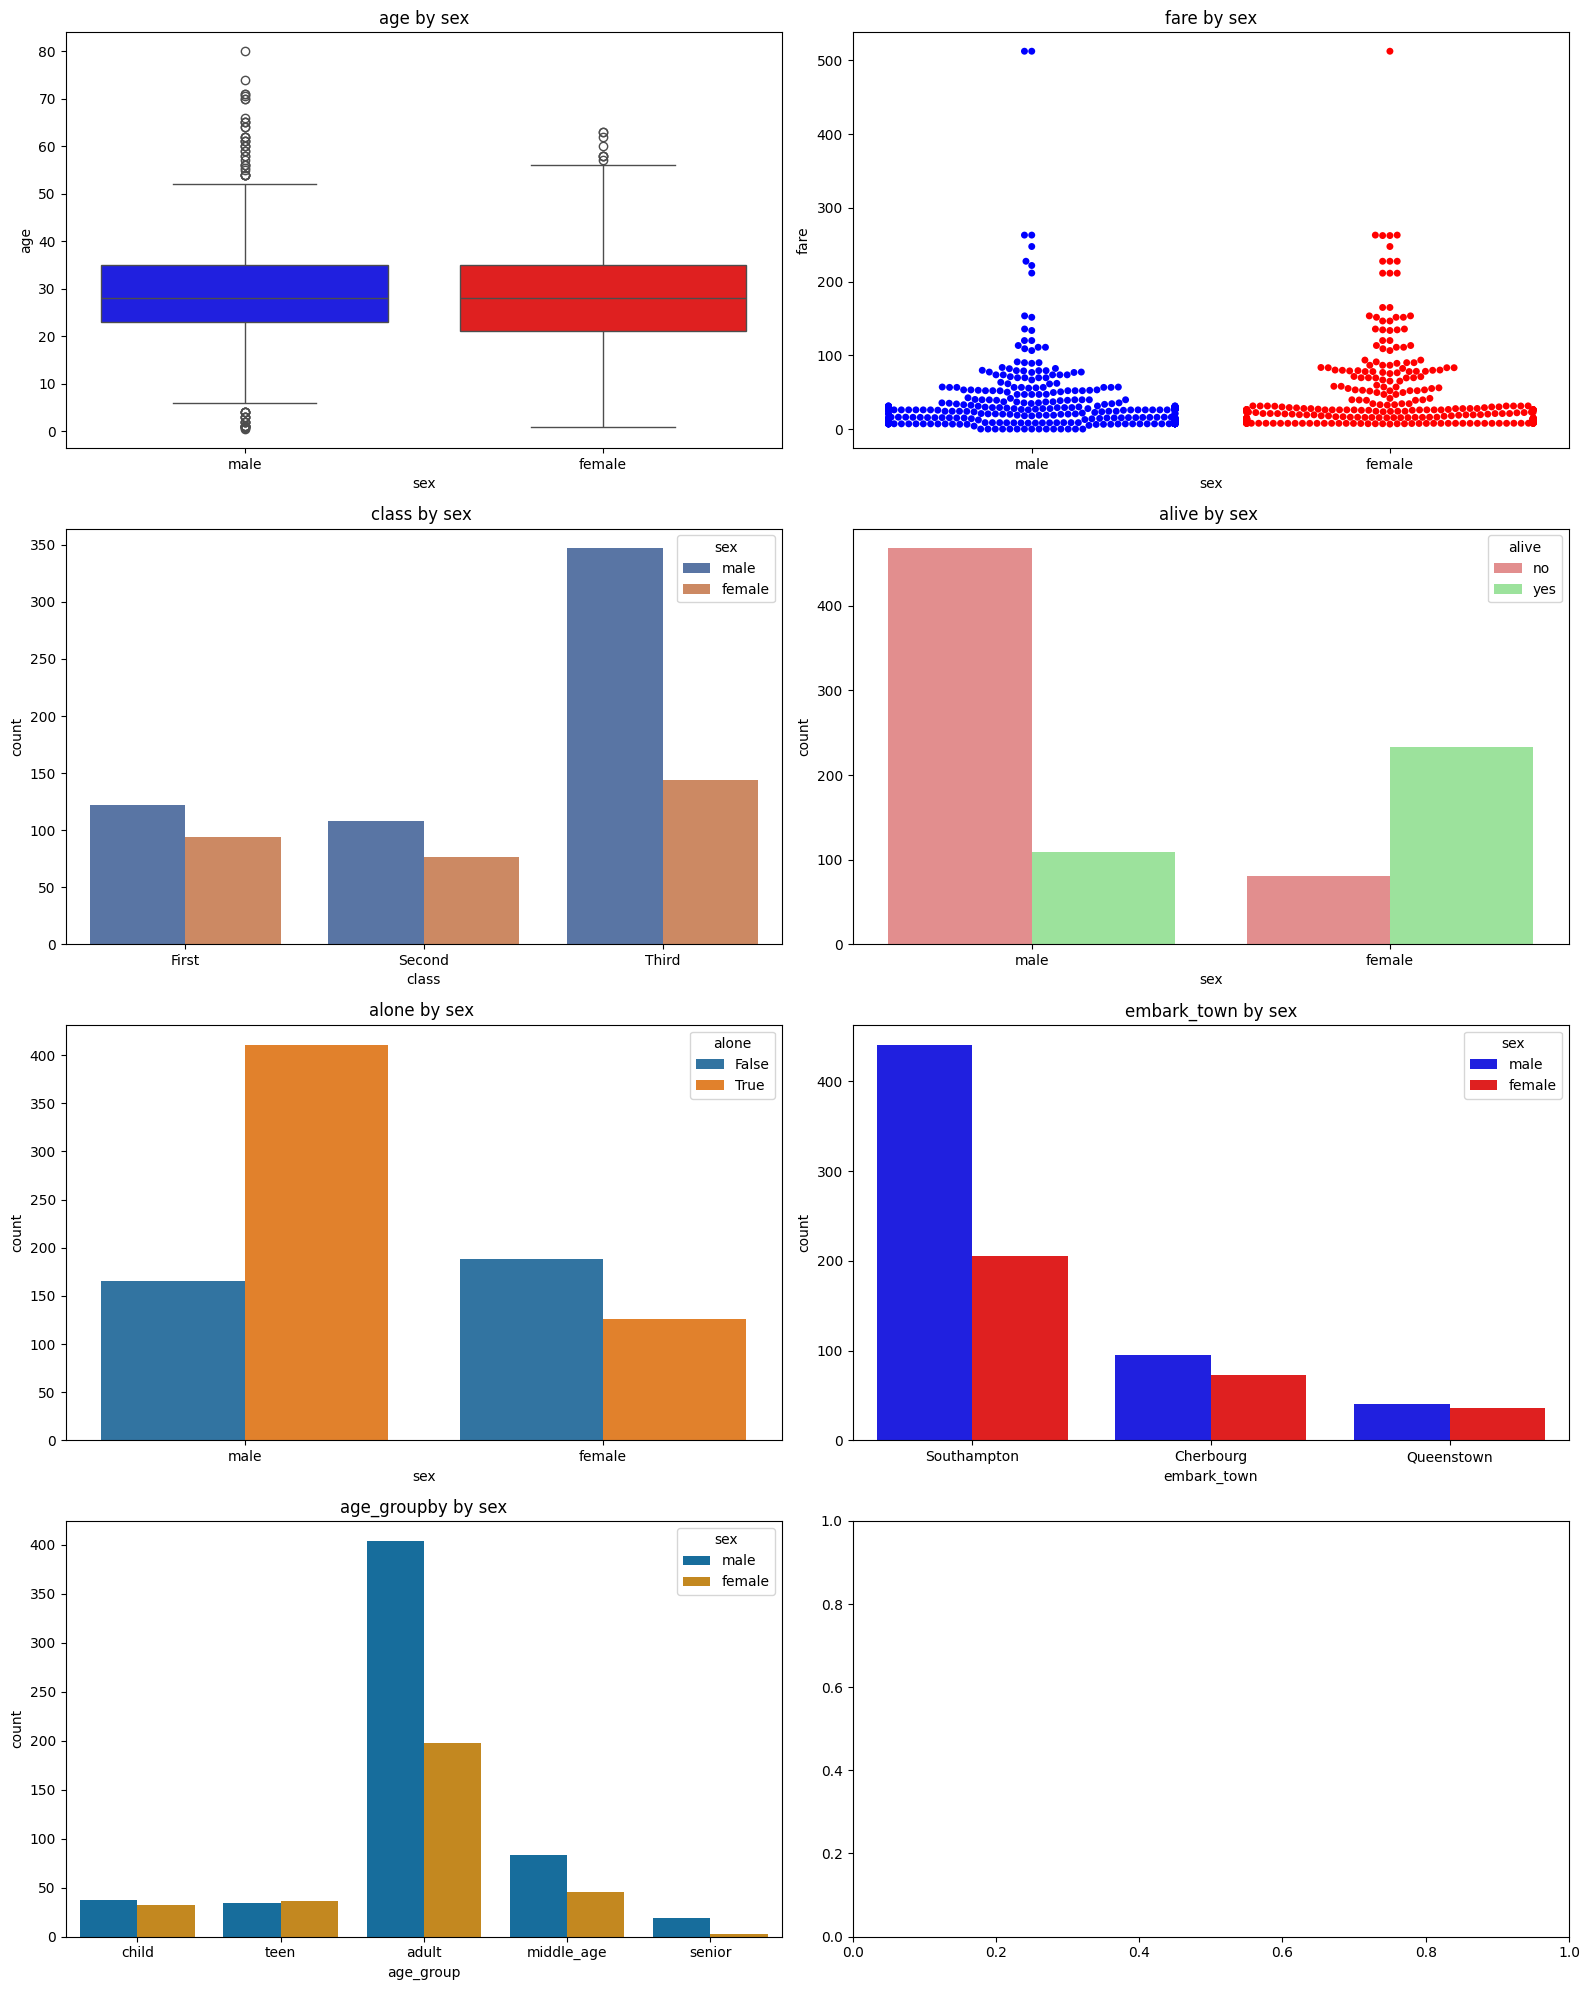

In [66]:
# figure 
fig,axes=plt.subplots(4,2,figsize=(16,20))
axes=axes.flatten() 
# age distribution by sex 
colors={'male':'blue','female':'red'}
sns.boxplot(x='sex',y='age',data=df,palette=colors,ax=axes[0])
axes[0].set_title('age by sex')
# fare distribution by sex 
sns.swarmplot(x='sex',y='fare',data=df,palette=colors,ax=axes[1])
axes[1].set_title('fare by sex')
# class distribution by sex
sns.countplot(x='class',hue='sex',data=df,ax=axes[2],palette='deep')
axes[2].set_title('class by sex ')
# alive distribituin by sex 
sns.countplot(x='sex',hue='alive',data=df,palette={'no':'lightcoral','yes':'lightgreen'},ax=axes[3])
axes[3].set_title('alive by sex ')
#alone distribution by sex
sns.countplot(x='sex',hue='alone',data=df,ax=axes[4])
axes[4].set_title('alone by sex ')
#embark_town distrubition by sex
sns.countplot(data=df,x='embark_town',hue='sex',palette=colors,ax=axes[5])
axes[5].set_title('embark_town by sex')
#age_group distribition sex 
sns.countplot(data=df,x='age_group',hue='sex',ax=axes[6],palette='colorblind')
axes[6].set_title('age_groupby by sex')
plt.tight_layout() 



## Summary of Analysis Based on Sex

Based on the visualizations we conducted on the sex column, we can summarize the following insights:

1. Age by Sex:  
   - The average age of female passengers is higher compared to males, indicating that males had more younger passengers (children and teens), while females were older on average.

2. Fare by Sex:  
   - Female passengers paid higher ticket fares on average, with some women paying nearly twice as much as the males.

3. Class by Sex:  
   - More males traveled in Third Class compared to females, roughly twice the number.  
   - In Second Class, males were also about twice the number of females.  
   - In First Class, the number of males and females was nearly equal, though males were still slightly more numerous.

4. Alive by Sex:  
   - The majority of male passengers did not survive (over 400 deceased), while around 90 males survived.  
   - In contrast, most female passengers survived (around 250 survived), and only about 90 females died.

5. Alone by Sex:  
   - More males traveled alone (around 411), while about 160 males traveled with family.  
   - Female passengers more often traveled with family (about 200), while around 150 traveled alone.

6. Embark Town by Sex:  
   - Male passengers outnumbered females at all embarkation points.  
   - Southampton had the highest number of passengers, while Queenstown had the fewest.

7. Age Group by Sex:  
   - Most passengers were adults (18-40 years old), followed by middle-aged passengers (40-60).  
   - Seniors were the least represented.  
   - In almost all age groups, the number of males exceeded females, except in the teen group (12-18 years) where slightly more females were present.

---

These visualizations collectively highlight clear gender differences in age, fare, class, survival, traveling alone, embarkation points, and age groups.  
Presenting all figures side by side allows for easier comparison and understanding of how gender influenced various aspects of the passenger dataset.

---

In [ ]:
# fare by class 
######!!!!!!!!!!!!!! now that i think about it, there could be an outlier here !!!!!!!!!!
def find_outlier_iqr(data):
    Q1f= data.quantile(0.25)
    Q3f=data.quantile(0.75)
    IQR_F=Q3f-Q1f
    lower_bound_f=Q1f-1.5*IQR_F
    upper_bound_f=Q3f+1.5*IQR_F
    return data[(data<lower_bound_f)|(data>upper_bound_f)]
